# Бинарная классификация: Stroke Prediction Dataset

* id	
* gender
* age	
* hypertension	
* heart_disease	
* ever_married	
* work_type	
* Residence_type	
* avg_glucose_level	
* bmi	
* smoking_status	
* **stroke** - Целевая колонка

## 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_to_data = 'stroke-prediction-dataset.csv'
df = pd.read_csv(path_to_data)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df.columns = df.columns.str.lower()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

for c in categorical_columns:
    if df[c].dtypes == 'object':
        df[c] = df[c].str.lower().str.replace(' ', '_').str.replace('-', '_')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly_smoked,1
1,51676,female,61.0,0,0,yes,self_employed,rural,202.21,NaN,never_smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.5,never_smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,1665,female,79.0,1,0,yes,self_employed,rural,174.12,24.0,never_smoked,1


In [7]:
df.drop_duplicates(inplace=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly_smoked,1
1,51676,female,61.0,0,0,yes,self_employed,rural,202.21,NaN,never_smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.5,never_smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,1665,female,79.0,1,0,yes,self_employed,rural,174.12,24.0,never_smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,female,80.0,1,0,yes,private,urban,83.75,NaN,never_smoked,0
5106,44873,female,81.0,0,0,yes,self_employed,urban,125.20,40.0,never_smoked,0
5107,19723,female,35.0,0,0,yes,self_employed,rural,82.99,30.6,never_smoked,0
5108,37544,male,51.0,0,0,yes,private,rural,166.29,25.6,formerly_smoked,0


## 2. Первоначальный анализ данных

In [8]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<Axes: >

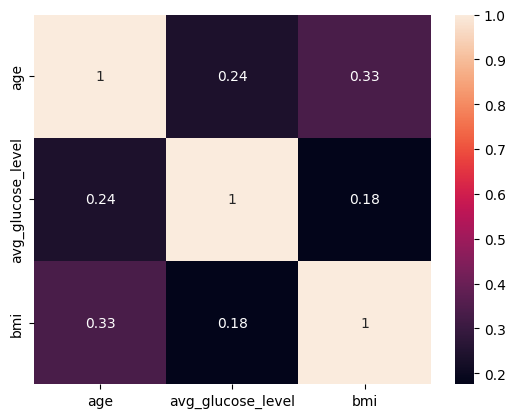

In [11]:
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [12]:
# Импутация пропусков для bmi колонки  используя общее среднее значение
bmi = df['bmi']
bmi_mean = bmi.mean()
bmi.fillna(bmi_mean, inplace=True)

In [13]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
for x in categorical_columns:
    print(x + ':', df[x].unique())
    for y in df[x].unique():
        print('  ', y, ':', df[x].value_counts()[y])
        print('     stroke=1:', ((df[x] == y) & (df['stroke'] == 1.0)).sum(), 'and stroke=0:', ((df[x] == y) & (df['stroke'] == 0)).sum())

gender: ['male' 'female' 'other']
   male : 2115
     stroke=1: 108 and stroke=0: 2007
   female : 2994
     stroke=1: 141 and stroke=0: 2853
   other : 1
     stroke=1: 0 and stroke=0: 1
hypertension: [0 1]
   0 : 4612
     stroke=1: 183 and stroke=0: 4429
   1 : 498
     stroke=1: 66 and stroke=0: 432
heart_disease: [1 0]
   1 : 276
     stroke=1: 47 and stroke=0: 229
   0 : 4834
     stroke=1: 202 and stroke=0: 4632
ever_married: ['yes' 'no']
   yes : 3353
     stroke=1: 220 and stroke=0: 3133
   no : 1757
     stroke=1: 29 and stroke=0: 1728
work_type: ['private' 'self_employed' 'govt_job' 'children' 'never_worked']
   private : 2925
     stroke=1: 149 and stroke=0: 2776
   self_employed : 819
     stroke=1: 65 and stroke=0: 754
   govt_job : 657
     stroke=1: 33 and stroke=0: 624
   children : 687
     stroke=1: 2 and stroke=0: 685
   never_worked : 22
     stroke=1: 0 and stroke=0: 22
residence_type: ['urban' 'rural']
   urban : 2596
     stroke=1: 135 and stroke=0: 2461
   rura

In [15]:
df = df.drop(df[df.gender == 'other'].index)
df = df.drop(df[df.work_type == 'never_worked'].index)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.600000,formerly_smoked,1
1,51676,female,61.0,0,0,yes,self_employed,rural,202.21,28.893237,never_smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.500000,never_smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.400000,smokes,1
4,1665,female,79.0,1,0,yes,self_employed,rural,174.12,24.000000,never_smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,female,80.0,1,0,yes,private,urban,83.75,28.893237,never_smoked,0
5106,44873,female,81.0,0,0,yes,self_employed,urban,125.20,40.000000,never_smoked,0
5107,19723,female,35.0,0,0,yes,self_employed,rural,82.99,30.600000,never_smoked,0
5108,37544,male,51.0,0,0,yes,private,rural,166.29,25.600000,formerly_smoked,0


## 3. EDA

In [14]:
df.stroke.value_counts(normalize=True)

stroke
0    0.951052
1    0.048948
Name: proportion, dtype: float64

In [15]:
df.stroke.mean()

0.04894829958718302

In [16]:
global_stroke_rate = df.stroke.mean()

In [17]:
from IPython.display import display
for c in categorical_columns:
    print(c)
    df_group = df.groupby(c).stroke.agg(['mean', 'count'])
    df_group['risk'] = df_group['mean'] / global_stroke_rate
    display(df_group)
    print()
    print()

gender


,mean,count,risk
gender,,,
female,0.047268,2983,0.965669
male,0.051331,2104,1.048674




hypertension


,mean,count,risk
hypertension,,,
0,0.039878,4589,0.814696
1,0.132530,498,2.707553




heart_disease


,mean,count,risk
heart_disease,,,
0,0.041987,4811,0.857785
1,0.170290,276,3.478974




ever_married


,mean,count,risk
ever_married,,,
no,0.016724,1734,0.341673
yes,0.065613,3353,1.340453




work_type


,mean,count,risk
work_type,,,
children,0.002911,687,0.059475
govt_job,0.050228,657,1.026150
private,0.050958,2924,1.041049
self_employed,0.079365,819,1.621406




residence_type


,mean,count,risk
residence_type,,,
rural,0.045491,2506,0.929365
urban,0.052305,2581,1.068583




smoking_status


,mean,count,risk
smoking_status,,,
formerly_smoked,0.079186,884,1.617738
never_smoked,0.047923,1878,0.979060
smokes,0.053232,789,1.087514
unknown,0.030599,1536,0.625128


In [18]:
# Важность признаков: Взаимная информация
from sklearn.metrics import mutual_info_score
def calculate_mi(series):
    return mutual_info_score(series, df.stroke)

In [19]:
df[categorical_columns].apply(calculate_mi).sort_values(ascending=False)

ever_married      0.006831
work_type         0.006640
hypertension      0.005960
heart_disease     0.005891
smoking_status    0.002736
residence_type    0.000125
gender            0.000043
dtype: float64

<Axes: >

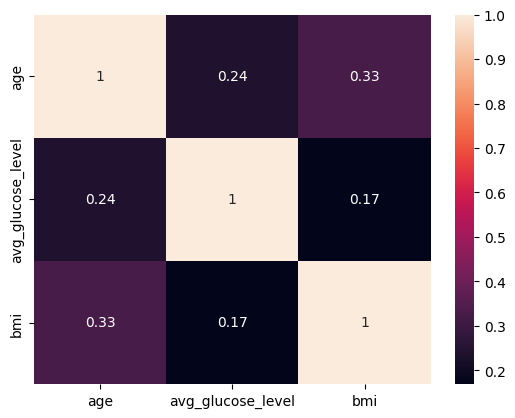

In [20]:
sns.heatmap(df[numerical_columns].corr(),annot=True)

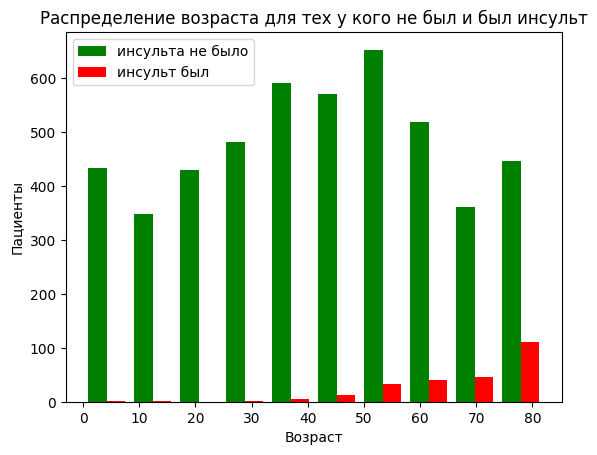

In [21]:
stroke_age_yes = df[df.stroke == 1].age
stroke_age_no = df[df.stroke == 0].age

plt.hist([stroke_age_no, stroke_age_yes], color=['green','red'], label=['инсульта не было', 'инсульт был'])
plt.title('Распределение возраста для тех у кого не был и был инсульт')
plt.xlabel('Возраст')
plt.ylabel('Пациенты')
plt.legend()
plt.show()

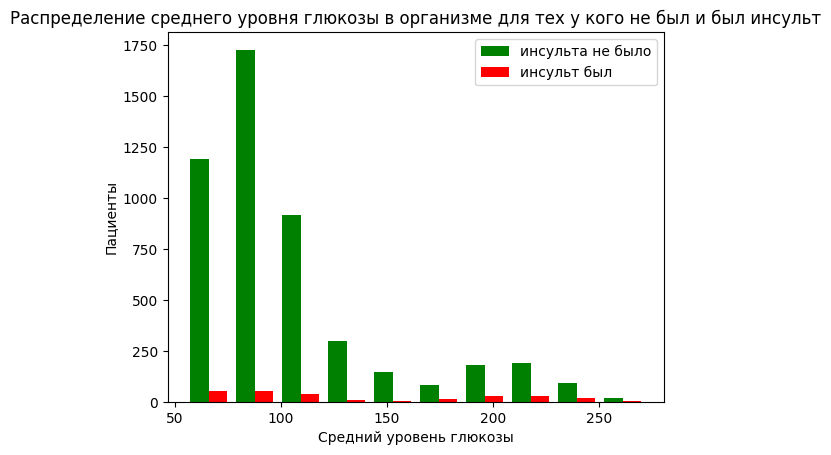

In [22]:
stroke_glucose_yes = df[df.stroke == 1].avg_glucose_level
stroke_glucose_no = df[df.stroke == 0].avg_glucose_level

plt.hist([stroke_glucose_no, stroke_glucose_yes], color=['green','red'], label=['инсульта не было', 'инсульт был'])
plt.title('Распределение среднего уровня глюкозы в организме для тех у кого не был и был инсульт')
plt.xlabel('Средний уровень глюкозы')
plt.ylabel('Пациенты')
plt.legend()
plt.show()

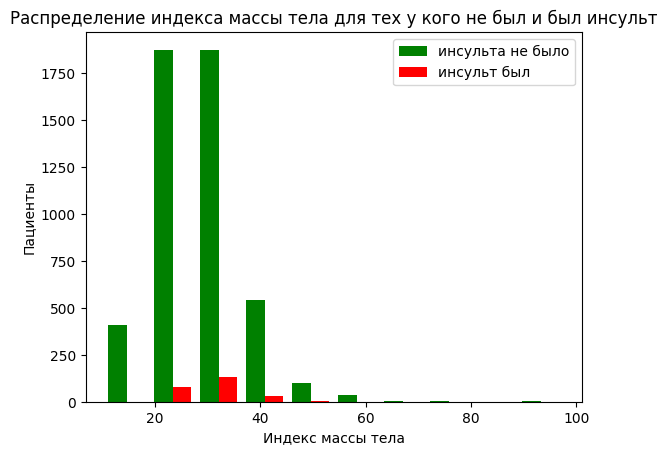

In [23]:
stroke_bmi_yes = df[df.stroke == 1].bmi
stroke_bmi_no = df[df.stroke == 0].bmi

plt.hist([stroke_bmi_no, stroke_bmi_yes], color=['green','red'], label=['инсульта не было', 'инсульт был'])
plt.title('Распределение индекса массы тела для тех у кого не был и был инсульт')
plt.xlabel('Индекс массы тела')
plt.ylabel('Пациенты')
plt.legend()
plt.show()

## 4. Train, test, valid split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df_train, df_test_and_valid = train_test_split(df, test_size=0.4, random_state=5)
print(len(df_train), len(df_test_and_valid))

3052 2035


In [26]:
df_test, df_val = train_test_split(df_test_and_valid, test_size=0.5, random_state=61)
print(len(df_train), len(df_test), len(df_val))

3052 1017 1018


In [27]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [28]:
y_train = df_train.stroke.values
y_test = df_test.stroke.values
y_val = df_val.stroke.values

In [29]:
del df_train['stroke']
del df_val['stroke']
del df_test['stroke']

In [30]:
df_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
0,8111,female,23.00,0,0,no,private,rural,104.09,27.900000,unknown
1,20370,female,50.00,0,0,yes,self_employed,rural,103.81,28.300000,never_smoked
2,21467,male,44.00,0,0,yes,private,urban,89.68,34.600000,unknown
3,68853,female,70.00,0,0,yes,private,rural,149.80,47.600000,unknown
4,37866,female,76.00,0,0,yes,self_employed,urban,193.61,37.600000,never_smoked
...,...,...,...,...,...,...,...,...,...,...,...
3047,121,female,38.00,0,0,yes,private,urban,91.44,28.893237,unknown
3048,54058,female,22.00,0,0,no,private,urban,56.84,29.900000,smokes
3049,34660,male,55.00,0,0,yes,self_employed,urban,69.97,25.800000,formerly_smoked
3050,61743,male,28.00,0,0,no,govt_job,urban,118.66,32.300000,never_smoked


In [31]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## 5. One-hot encoding

In [32]:
from sklearn.feature_extraction import DictVectorizer

In [33]:
dv = DictVectorizer(sparse = False)

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3052 entries, 0 to 3051
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3052 non-null   int64  
 1   gender             3052 non-null   object 
 2   age                3052 non-null   float64
 3   hypertension       3052 non-null   int64  
 4   heart_disease      3052 non-null   int64  
 5   ever_married       3052 non-null   object 
 6   work_type          3052 non-null   object 
 7   residence_type     3052 non-null   object 
 8   avg_glucose_level  3052 non-null   float64
 9   bmi                3052 non-null   float64
 10  smoking_status     3052 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 262.4+ KB


In [35]:
df_train.hypertension = df_train.hypertension.apply(lambda x: 'yes' if x == 1.0 else 'no')
df_train.heart_disease = df_train.heart_disease.apply(lambda y: 'yes' if y == 1.0 else 'no')
df_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
0,8111,female,23.0,no,no,no,private,rural,104.09,27.9,unknown
1,20370,female,50.0,no,no,yes,self_employed,rural,103.81,28.3,never_smoked
2,21467,male,44.0,no,no,yes,private,urban,89.68,34.6,unknown
3,68853,female,70.0,no,no,yes,private,rural,149.80,47.6,unknown
4,37866,female,76.0,no,no,yes,self_employed,urban,193.61,37.6,never_smoked


In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3052 entries, 0 to 3051
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3052 non-null   int64  
 1   gender             3052 non-null   object 
 2   age                3052 non-null   float64
 3   hypertension       3052 non-null   object 
 4   heart_disease      3052 non-null   object 
 5   ever_married       3052 non-null   object 
 6   work_type          3052 non-null   object 
 7   residence_type     3052 non-null   object 
 8   avg_glucose_level  3052 non-null   float64
 9   bmi                3052 non-null   float64
 10  smoking_status     3052 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 262.4+ KB


In [37]:
train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
train_dict[0]

{'gender': 'female',
 'hypertension': 'no',
 'heart_disease': 'no',
 'ever_married': 'no',
 'work_type': 'private',
 'residence_type': 'rural',
 'smoking_status': 'unknown',
 'age': 23.0,
 'avg_glucose_level': 104.09,
 'bmi': 27.9}

In [38]:
X_train = dv.fit_transform(train_dict)
X_train[0]

array([ 23.  , 104.09,  27.9 ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ,
         0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         1.  ,   0.  ,   0.  ,   1.  ,   0.  ])

In [39]:
dv.get_feature_names_out()

array(['age', 'avg_glucose_level', 'bmi', 'ever_married=no',
       'ever_married=yes', 'gender=female', 'gender=male',
       'heart_disease=no', 'heart_disease=yes', 'hypertension=no',
       'hypertension=yes', 'residence_type=rural', 'residence_type=urban',
       'smoking_status=formerly_smoked', 'smoking_status=never_smoked',
       'smoking_status=smokes', 'smoking_status=unknown',
       'work_type=children', 'work_type=govt_job', 'work_type=private',
       'work_type=self_employed'], dtype=object)

In [40]:
df_val.hypertension = df_val.hypertension.apply(lambda x: 'yes' if x == 1.0 else 'no')
df_val.heart_disease = df_val.heart_disease.apply(lambda y: 'yes' if y == 1.0 else 'no')
df_val.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
0,54795,female,12.0,no,no,no,children,rural,132.85,16.200000,never_smoked
1,40980,male,79.0,yes,no,yes,self_employed,urban,72.04,23.600000,formerly_smoked
2,27163,female,60.0,yes,no,yes,private,urban,109.00,28.893237,unknown
3,19324,female,51.0,no,no,yes,govt_job,urban,90.67,37.800000,unknown
4,3428,female,61.0,no,no,yes,self_employed,urban,77.06,27.000000,never_smoked


In [41]:
val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
val_dict[0]

{'gender': 'female',
 'hypertension': 'no',
 'heart_disease': 'no',
 'ever_married': 'no',
 'work_type': 'children',
 'residence_type': 'rural',
 'smoking_status': 'never_smoked',
 'age': 12.0,
 'avg_glucose_level': 132.85,
 'bmi': 16.2}

In [42]:
X_val = dv.transform(val_dict)
X_val[0]

array([ 12.  , 132.85,  16.2 ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ,
         0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ,   0.  ])

## 6. Обучение модели Логистической регрессии c Scikit-Learn

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\kamila\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
model.coef_
# w1, w2, ..., w45

array([[ 0.06805444,  0.00398012,  0.00111218, -0.72994558, -1.00554448,
        -0.81637908, -0.91911098, -0.99512545, -0.74036461, -1.00060171,
        -0.73488835, -0.96848422, -0.76700583, -0.36846261, -0.54296576,
        -0.19215623, -0.63190545, -0.54347541, -0.27252713, -0.28191845,
        -0.63756907]])

In [46]:
model.intercept_
# w0 (bias)

array([-1.86641627])

In [47]:
model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
model.predict_proba(X_val)[:, 1]

array([0.00223793, 0.16730529, 0.0724299 , ..., 0.15057772, 0.02869352,
       0.15403777])

In [49]:
y_val_pred = model.predict_proba(X_val)[:, 1]
y_val_pred

array([0.00223793, 0.16730529, 0.0724299 , ..., 0.15057772, 0.02869352,
       0.15403777])

In [50]:
stroke_descision = (y_val_pred >= 0.5)
stroke_descision

array([False, False, False, ..., False, False, False])

In [51]:
df_val[stroke_descision] # никто не имеет инсульт по решению этой модели?

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
44,20463,male,81.0,yes,yes,yes,private,urban,250.89,28.1,smokes


In [52]:
(y_val == stroke_descision).mean()

0.9597249508840865

In [53]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_val_pred
df_pred['prediction'] = stroke_descision.astype(int)
df_pred['actual'] = y_val
df_pred

,probability,prediction,actual
0,0.002238,0,0
1,0.167305,0,0
2,0.072430,0,0
3,0.029834,0,0
4,0.041346,0,0
...,...,...,...
1013,0.026793,0,0
1014,0.045290,0,0
1015,0.150578,0,0
1016,0.028694,0,0


In [54]:
(df_pred['prediction'] == df_pred['actual']).mean()

0.9597249508840865

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [56]:
accuracy = accuracy_score(df_pred['actual'], df_pred['prediction'])
precision = precision_score(df_pred['actual'], df_pred['prediction'])
recall = recall_score(df_pred['actual'], df_pred['prediction'])
f1 = f1_score(df_pred['actual'], df_pred['prediction'])

In [57]:
model_name = 'Logistic Regression Base t=0.5'
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

metrics_df = pd.concat([metrics_df ,pd.DataFrame([
    {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
])], ignore_index=True)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression Base t=0.5,0.959725,1.0,0.02381,0.046512


<function matplotlib.pyplot.show(close=None, block=None)>

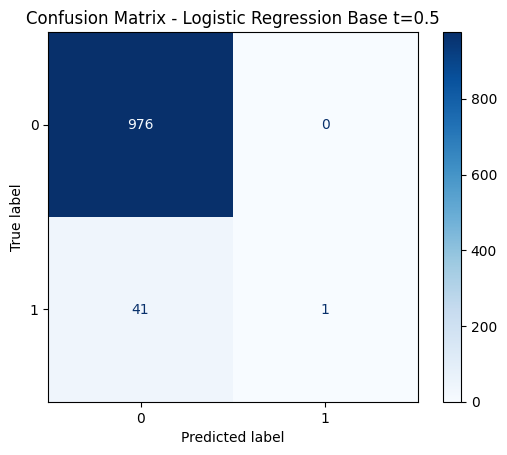

In [401]:
conf_matrix = confusion_matrix(df_pred['actual'], df_pred['prediction'])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - {model_name}')
plt.show

## 7. Улучшение модели

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
def split_data(df):
    df_train, df_test_and_valid = train_test_split(df, test_size=0.4, random_state=5)
    df_test, df_val = train_test_split(df_test_and_valid, test_size=0.5, random_state=61)
    y_train = df_train.stroke.values
    y_test = df_test.stroke.values
    y_val = df_val.stroke.values
    del df_train['stroke']
    del df_val['stroke']
    del df_test['stroke']
    return df_train, y_train, df_test, y_test, df_val, y_val

In [115]:
def prepare_data(df_train, df_val, features):
    df_train.hypertension = df_train.hypertension.apply(lambda x: 'yes' if x == 1.0 else 'no')
    df_train.heart_disease = df_train.heart_disease.apply(lambda y: 'yes' if y == 1.0 else 'no')
    df_val.hypertension = df_val.hypertension.apply(lambda x: 'yes' if x == 1.0 else 'no')
    df_val.heart_disease = df_val.heart_disease.apply(lambda y: 'yes' if y == 1.0 else 'no')
    dicts_train_temp = df_train[features].to_dict(orient='records')
    dicts_val_temp = df_val[features].to_dict(orient='records')
    dv_temp = DictVectorizer(sparse=False)
    X_train_temp = dv_temp.fit_transform(dicts_train_temp)
    X_valid_temp = dv_temp.transform(dicts_val_temp)
    return X_train_temp, X_valid_temp

In [61]:
def train_model(X_train, y_train):
    model_temp = LogisticRegression()
    model_temp.fit(X_train, y_train)
    return model_temp

In [62]:
def model_eval(model, model_name, X_val, y_val, treshold):
    y_pred = model.predict_proba(X_val)[:, 1]
    stroke_descision = (y_pred >= treshold).astype(int)
    accuracy = accuracy_score(y_val, stroke_descision)
    precision = precision_score(y_val, stroke_descision)
    recall = recall_score(y_val, stroke_descision)
    f1 = f1_score(y_val, stroke_descision)
    res_df = pd.DataFrame([{'Model': model_name,'Accuracy': accuracy,'Precision': precision,'Recall': recall,'F1 Score': f1}])
    return res_df, stroke_descision, y_pred

In [65]:
df_train, y_train, df_test, y_test, df_val, y_val = split_data(df)
X_train, X_valid = prepare_data(df_train, df_val, categorical_columns + numerical_columns)
model_new = train_model(X_train, y_train)
res_model_df, y_pred_class, y_pred_proba = model_eval(model_new,'Test functions t=0.5', X_valid, y_val, 0.5)
metrics_df = pd.concat([metrics_df , res_model_df], ignore_index=True)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression Base t=0.5,0.959725,1.0,0.02381,0.046512
1,Test functions t=0.5,0.959725,1.0,0.02381,0.046512


In [64]:
#metrics_df = metrics_df.drop([1,2], axis=0)
metrics_df = metrics_df.drop(1, axis=0)

## 7.1 Поиск лучшего threshold

In [66]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from numpy import sqrt
from numpy import argmax
from numpy import arange

In [67]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

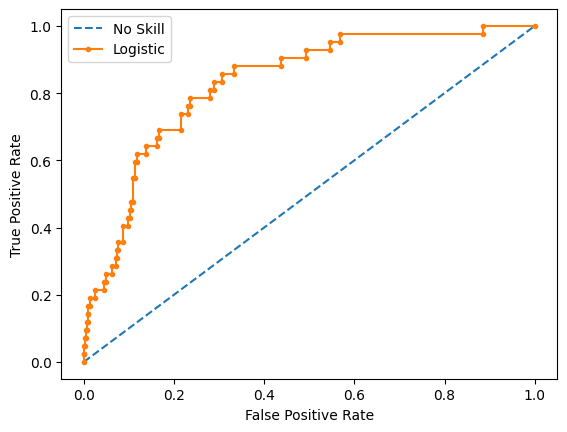

In [68]:
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [69]:
def to_labels(pos_probs, threshold):
 return (pos_probs >= threshold).astype('int')

thresholds = arange(0, 1, 0.001)

scores = [f1_score(y_val, to_labels(y_pred_proba, t)) for t in thresholds]

ix = argmax(scores)
print('Best Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Best Threshold=0.115, F-Score=0.28108


In [70]:
df_train, y_train, df_test, y_test, df_val, y_val = split_data(df)
X_train, X_valid = prepare_data(df_train, df_val, categorical_columns + numerical_columns)
model_new = train_model(X_train, y_train)
res_model_df, y_pred_class, y_pred_proba = model_eval(model_new,'Logistic Regression t=0.115', X_valid, y_val, 0.115)
metrics_df = pd.concat([metrics_df , res_model_df], ignore_index=True)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression Base t=0.5,0.959725,1.000000,0.023810,0.046512
1,Test functions t=0.5,0.959725,1.000000,0.023810,0.046512
2,Logistic Regression t=0.115,0.869352,0.181818,0.619048,0.281081


<function matplotlib.pyplot.show(close=None, block=None)>

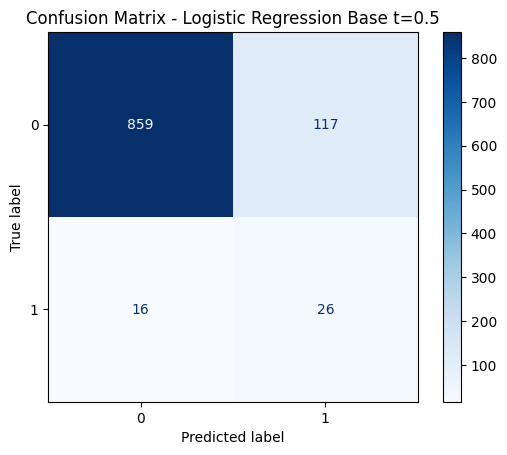

In [71]:
conf_matrix = confusion_matrix(y_val, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - {model_name}')
plt.show

## 7.2. Feature Engineering

In [72]:
df[categorical_columns].apply(calculate_mi).sort_values(ascending=False)

ever_married      0.006831
work_type         0.006640
hypertension      0.005960
heart_disease     0.005891
smoking_status    0.002736
residence_type    0.000125
gender            0.000043
dtype: float64

In [73]:
df[categorical_columns].apply(calculate_mi).sort_values(ascending=False)[:-2]

ever_married      0.006831
work_type         0.006640
hypertension      0.005960
heart_disease     0.005891
smoking_status    0.002736
dtype: float64

In [74]:
feature_columns = list(df[categorical_columns].apply(calculate_mi).sort_values(ascending=False)[:-2].index)

In [75]:
df_train, y_train, df_test, y_test, df_val, y_val = split_data(df)
X_train, X_valid = prepare_data(df_train, df_val, feature_columns)
model_new = train_model(X_train, y_train)
res_model_df, y_pred_class, y_pred_proba = model_eval(model_new,'LR w/o 2 feetures t=0.115', X_valid, y_val, 0.115)
metrics_df = pd.concat([metrics_df , res_model_df], ignore_index=True)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression Base t=0.5,0.959725,1.000000,0.023810,0.046512
1,Test functions t=0.5,0.959725,1.000000,0.023810,0.046512
2,Logistic Regression t=0.115,0.869352,0.181818,0.619048,0.281081
3,LR w/o 2 feetures t=0.115,0.909627,0.142857,0.238095,0.178571


## 7.3. Min-max normalization

In [76]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [77]:
numerical_columns

['age', 'avg_glucose_level', 'bmi']

In [78]:
df_copy = df.copy()
df_copy

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.600000,formerly_smoked,1
1,51676,female,61.0,0,0,yes,self_employed,rural,202.21,28.893237,never_smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.500000,never_smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.400000,smokes,1
4,1665,female,79.0,1,0,yes,self_employed,rural,174.12,24.000000,never_smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,female,80.0,1,0,yes,private,urban,83.75,28.893237,never_smoked,0
5106,44873,female,81.0,0,0,yes,self_employed,urban,125.20,40.000000,never_smoked,0
5107,19723,female,35.0,0,0,yes,self_employed,rural,82.99,30.600000,never_smoked,0
5108,37544,male,51.0,0,0,yes,private,rural,166.29,25.600000,formerly_smoked,0


In [79]:
for col in numerical_columns:
    min_col = df_copy[col].min()
    max_col = df_copy[col].max()

    df_copy[col] = (df_copy[col] - min_col) / (max_col - min_col)

In [80]:
df_copy[numerical_columns]

,age,avg_glucose_level,bmi
0,0.816895,0.801265,0.301260
1,0.743652,0.679023,0.212981
2,0.975586,0.234512,0.254296
3,0.597168,0.536008,0.276060
4,0.963379,0.549349,0.156930
...,...,...,...
5105,0.975586,0.132167,0.212981
5106,0.987793,0.323516,0.340206
5107,0.426270,0.128658,0.232532
5108,0.621582,0.513203,0.175258


In [81]:
df_train, y_train, df_test, y_test, df_val, y_val = split_data(df_copy)

In [82]:
feature_columns = categorical_columns + numerical_columns
X_train, X_valid = prepare_data(df_train, df_val, feature_columns)

model_new = train_model(X_train, y_train)
res_model_df, y_pred_class, y_pred_proba = model_eval(model_new,'LR Min-Max t=0.115', X_valid, y_val, 0.115)
metrics_df = pd.concat([metrics_df , res_model_df], ignore_index=True)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression Base t=0.5,0.959725,1.000000,0.023810,0.046512
1,Test functions t=0.5,0.959725,1.000000,0.023810,0.046512
2,Logistic Regression t=0.115,0.869352,0.181818,0.619048,0.281081
3,LR w/o 2 feetures t=0.115,0.909627,0.142857,0.238095,0.178571
4,LR Min-Max t=0.115,0.878193,0.174603,0.523810,0.261905


In [83]:
le_enc_cols = ['gender','ever_married', 'residence_type']
gender_map = {'male': 0, 'female': 1}
y_n_map = {'yes': 1, 'no': 0}
residence_map = {'urban': 1, 'rural': 0}

for col in le_enc_cols:
    if col == 'gender':
        df_copy[col] = df_copy[col].map(gender_map)
    elif col == 'residence_type':
        df_copy[col] = df_copy[col].map(residence_map)
    else:
        df_copy[col] = df_copy[col].map(y_n_map)

In [84]:
df_copy

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,0.816895,0,1,1,private,1,0.801265,0.301260,formerly_smoked,1
1,51676,1,0.743652,0,0,1,self_employed,0,0.679023,0.212981,never_smoked,1
2,31112,0,0.975586,0,1,1,private,0,0.234512,0.254296,never_smoked,1
3,60182,1,0.597168,0,0,1,private,1,0.536008,0.276060,smokes,1
4,1665,1,0.963379,1,0,1,self_employed,0,0.549349,0.156930,never_smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,0.975586,1,0,1,private,1,0.132167,0.212981,never_smoked,0
5106,44873,1,0.987793,0,0,1,self_employed,1,0.323516,0.340206,never_smoked,0
5107,19723,1,0.426270,0,0,1,self_employed,0,0.128658,0.232532,never_smoked,0
5108,37544,0,0.621582,0,0,1,private,0,0.513203,0.175258,formerly_smoked,0


In [85]:
df_copy[le_enc_cols]

,gender,ever_married,residence_type
0,0,1,1
1,1,1,0
2,0,1,0
3,1,1,1
4,1,1,0
...,...,...,...
5105,1,1,1
5106,1,1,1
5107,1,1,0
5108,0,1,0


In [89]:
df_train, y_train, df_test, y_test, df_val, y_val = split_data(df_copy)

In [90]:
feature_columns = categorical_columns + numerical_columns
X_train, X_valid = prepare_data(df_train, df_val, feature_columns)

model_new = train_model(X_train, y_train)
res_model_df, y_pred_class, y_pred_proba = model_eval(model_new,'LR le_enc_cols t=0.115', X_valid, y_val, 0.115)
metrics_df = pd.concat([metrics_df , res_model_df], ignore_index=True)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression Base t=0.5,0.959725,1.000000,0.023810,0.046512
1,Test functions t=0.5,0.959725,1.000000,0.023810,0.046512
2,Logistic Regression t=0.115,0.869352,0.181818,0.619048,0.281081
3,LR w/o 2 feetures t=0.115,0.909627,0.142857,0.238095,0.178571
4,LR Min-Max t=0.115,0.878193,0.174603,0.523810,0.261905
5,LR le_enc_cols t=0.115,0.878193,0.174603,0.523810,0.261905


In [88]:
#metrics_df = metrics_df.drop(5, axis=0)

In [91]:
from sklearn import metrics, feature_selection,neighbors, model_selection, preprocessing, neighbors, linear_model, svm, ensemble

In [92]:
seed = 345
models = [
('k_nearest_neighbors', neighbors.KNeighborsClassifier()),
('logistic_regression', linear_model.LogisticRegression(random_state=seed)),
('support_vector_machines', svm.SVC(random_state=seed)),
('random_forest', ensemble.RandomForestClassifier(random_state=seed)),
('gradient_boosting', ensemble.GradientBoostingClassifier(random_state=seed)),]

def run_experiments(models, X_train=X_train, y_train=y_train, X_test=X_valid, y_test=y_val, seed=seed):
    results = dict()
    for name, model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        f1_score = metrics.f1_score(y_test, predictions)
        print(f"{name} --> acc = {accuracy * 100}%, f1 = {f1_score}")
        results[name] = accuracy

results = run_experiments(models=models)

k_nearest_neighbors --> acc = 95.87426326129666%, f1 = 0.08695652173913042
logistic_regression --> acc = 95.87426326129666%, f1 = 0.0
support_vector_machines --> acc = 95.87426326129666%, f1 = 0.0
random_forest --> acc = 95.97249508840865%, f1 = 0.08888888888888889
gradient_boosting --> acc = 95.67779960707269%, f1 = 0.0


## 8. Обучение финальной модели

In [111]:
df_copy = df.copy()
for col in numerical_columns:
    min_col = df_copy[col].min()
    max_col = df_copy[col].max()

    df_copy[col] = (df_copy[col] - min_col) / (max_col - min_col)

In [116]:
# Eval model on test set

df_train, y_train, df_test, y_test, df_val, y_val = split_data(df_copy)
X_train, X_test = prepare_data(df_train, df_test, feature_columns)
model_new = train_model(X_train, y_train)
res_model_df, y_pred_class, y_pred_proba = model_eval(model_new,'LR Model t=0.115 Test data', X_test, y_test, 0.115)
metrics_df = pd.concat([metrics_df , res_model_df], ignore_index=True)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression Base t=0.5,0.959725,1.000000,0.023810,0.046512
1,Test functions t=0.5,0.959725,1.000000,0.023810,0.046512
2,Logistic Regression t=0.115,0.869352,0.181818,0.619048,0.281081
3,LR w/o 2 feetures t=0.115,0.909627,0.142857,0.238095,0.178571
4,LR Min-Max t=0.115,0.878193,0.174603,0.523810,0.261905
5,LR le_enc_cols t=0.115,0.878193,0.174603,0.523810,0.261905
6,LR Model t=0.115 Test data,0.861357,0.214765,0.571429,0.312195


In [117]:
# Train on df_train + df_val

df_train, y_train, df_test, y_test, df_val, y_val = split_data(df_copy)
X_train, X_valid = prepare_data(pd.concat([df_train , df_test], ignore_index=True), df_val, feature_columns)
model_new = train_model(X_train, np.concatenate((y_train, y_test), axis=0))
res_model_df, y_pred_class, y_pred_proba = model_eval(model_new,'LR Model t=0.281 (train+test)', X_valid, y_val, 0.115)
metrics_df = pd.concat([metrics_df , res_model_df], ignore_index=True)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression Base t=0.5,0.959725,1.000000,0.023810,0.046512
1,Test functions t=0.5,0.959725,1.000000,0.023810,0.046512
2,Logistic Regression t=0.115,0.869352,0.181818,0.619048,0.281081
3,LR w/o 2 feetures t=0.115,0.909627,0.142857,0.238095,0.178571
4,LR Min-Max t=0.115,0.878193,0.174603,0.523810,0.261905
5,LR le_enc_cols t=0.115,0.878193,0.174603,0.523810,0.261905
6,LR Model t=0.115 Test data,0.861357,0.214765,0.571429,0.312195
7,LR Model t=0.281 (train+test),0.873281,0.172932,0.547619,0.262857


In [118]:
# Train on df_train + df_val

df_train, y_train, df_test, y_test, df_val, y_val = split_data(df_copy)
X_train, X_test = prepare_data(pd.concat([df_train , df_val], ignore_index=True), df_test, feature_columns)
model_new = train_model(X_train, np.concatenate((y_train, y_val), axis=0))
res_model_df, y_pred_class, y_pred_proba = model_eval(model_new,'LR Model t=0.281 (train+val)', X_test, y_test, 0.115)
metrics_df = pd.concat([metrics_df , res_model_df], ignore_index=True)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression Base t=0.5,0.959725,1.000000,0.023810,0.046512
1,Test functions t=0.5,0.959725,1.000000,0.023810,0.046512
2,Logistic Regression t=0.115,0.869352,0.181818,0.619048,0.281081
3,LR w/o 2 feetures t=0.115,0.909627,0.142857,0.238095,0.178571
4,LR Min-Max t=0.115,0.878193,0.174603,0.523810,0.261905
5,LR le_enc_cols t=0.115,0.878193,0.174603,0.523810,0.261905
6,LR Model t=0.115 Test data,0.861357,0.214765,0.571429,0.312195
7,LR Model t=0.281 (train+test),0.873281,0.172932,0.547619,0.262857
8,LR Model t=0.281 (train+val),0.867257,0.231293,0.607143,0.334975


In [119]:
def prepare_data(df_train, df_val, features):
    df_train.hypertension = df_train.hypertension.apply(lambda x: 'yes' if x == 1.0 else 'no')
    df_train.heart_disease = df_train.heart_disease.apply(lambda y: 'yes' if y == 1.0 else 'no')
    df_val.hypertension = df_val.hypertension.apply(lambda x: 'yes' if x == 1.0 else 'no')
    df_val.heart_disease = df_val.heart_disease.apply(lambda y: 'yes' if y == 1.0 else 'no')
    dicts_train_temp = df_train[features].to_dict(orient='records')
    dicts_val_temp = df_val[features].to_dict(orient='records')
    dv_temp = DictVectorizer(sparse=False)
    X_train_temp = dv_temp.fit_transform(dicts_train_temp)
    X_valid_temp = dv_temp.transform(dicts_val_temp)
    return X_train_temp, X_valid_temp, dv_temp

In [120]:
df_train, y_train, df_test, y_test, df_val, y_val = split_data(df_copy)
X_train, X_valid, dv_model = prepare_data(pd.concat([df_train , df_test, df_val], ignore_index=True), df_val, feature_columns)
model_final = train_model(X_train, np.concatenate((y_train, y_test, y_val), axis=0))

## 9. Сохранение модели в файл

In [121]:
import pickle

In [122]:
model_file_path = 'lr_model_stroke_prediction.sav'
pickle.dump(model_final, open(model_file_path, 'wb'))

In [123]:
encoding_model_file_path = 'encoding_model.sav'
pickle.dump(dv_model, open(encoding_model_file_path, 'wb'))

In [124]:
loaded_model = pickle.load(open(model_file_path, 'rb'))
loaded_encoding_model = pickle.load(open(encoding_model_file_path, 'rb'))
res_model_df, y_pred_class, y_pred_proba = model_eval(loaded_model,'LR Model from file', X_valid, y_val, 0.115)
res_model_df

,Model,Accuracy,Precision,Recall,F1 Score
0,LR Model from file,0.874263,0.179104,0.571429,0.272727


## 10.  Функция для изпользования

In [125]:
numerical = ['age', 'avg_glucose_level', 'bmi']
categorical = ['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'residence_type',
 'smoking_status']

def predict_stroke(model, encoding_model, df_input, treshold):

    scaler = MinMaxScaler()

    df_original = df_input.copy()
    df_input[numerical] = scaler.fit_transform(df_input[numerical])
    
    dicts_df = df_input[categorical + numerical].to_dict(orient='records')
    X = encoding_model.transform(dicts_df)
    y_pred = model.predict_proba(X)[:, 1]
    stroke_descision = (y_pred >= treshold).astype(int)
    df_original['stroke_predicted'] = stroke_descision
    df_original['stroke_predicted_probability'] = y_pred

    return df_original


In [126]:
df_new_input = df.loc[:100].drop('stroke', axis = 1)

In [127]:
df_new_input

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.600000,formerly_smoked
1,51676,female,61.0,0,0,yes,self_employed,rural,202.21,28.893237,never_smoked
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.500000,never_smoked
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.400000,smokes
4,1665,female,79.0,1,0,yes,self_employed,rural,174.12,24.000000,never_smoked
...,...,...,...,...,...,...,...,...,...,...,...
96,35512,female,70.0,0,0,yes,self_employed,rural,76.34,24.400000,formerly_smoked
97,56841,male,58.0,0,1,yes,private,rural,240.59,31.400000,smokes
98,8154,male,57.0,1,0,yes,govt_job,urban,78.92,27.700000,formerly_smoked
99,4639,female,69.0,0,0,yes,govt_job,urban,82.81,28.000000,never_smoked


In [129]:
res_temp = predict_stroke(loaded_model, loaded_encoding_model, df_new_input, 0.115)
res_temp

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke_predicted,stroke_predicted_probability
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.600000,formerly_smoked,0,0.107298
1,51676,female,61.0,0,0,yes,self_employed,rural,202.21,28.893237,never_smoked,0,0.028367
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.500000,never_smoked,1,0.190764
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.400000,smokes,0,0.011460
4,1665,female,79.0,1,0,yes,self_employed,rural,174.12,24.000000,never_smoked,1,0.177325
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,35512,female,70.0,0,0,yes,self_employed,rural,76.34,24.400000,formerly_smoked,0,0.056471
97,56841,male,58.0,0,1,yes,private,rural,240.59,31.400000,smokes,0,0.040102
98,8154,male,57.0,1,0,yes,govt_job,urban,78.92,27.700000,formerly_smoked,0,0.016411
99,4639,female,69.0,0,0,yes,govt_job,urban,82.81,28.000000,never_smoked,0,0.052889


In [130]:
df_new_input.to_csv("stroke_test_data.csv")